In [1]:
# This cell connects to google drive, authenticates connection, and iterates over file list displaying each file's title and ID.
# it also imports and installs all the necessary libraries
!pip install -U -q PyDrive
!pip install -U -q wordcloud
!pip install -U -q bokeh
!pip install textblob
!pip install sklearn

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup

from wordcloud import WordCloud
from scipy.stats import hmean
from scipy.stats import norm
from pylab import *
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
from bokeh.models import HoverTool

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

from time import time

  

     |████████████████████████████████| 18.5 MB 412 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 0.12.1 requires bokeh<2.4.0,>=2.3.0, but you have bokeh 2.4.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


# **Topic 4**

In [4]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_4.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      3
1      bhujbal says higher power rate driving industr...  Negative      3
2      mandira bedi shares a monochrome picture in a ...  Negative      0
3      harassment in office  dm seeks action taken re...  Negative      2
4                    two students end their lives mumbai  Negative      1
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      0
62960  going to india gate tonight? you could be in f...  Positive      2
62961  ; cops to ensure safe new year celebrations in...  Positive      1
62962  ten more private trains from mumbai on cards m...  Positive      1
62963  a trip to a tribal village with super cop vija...  Positive      1

[62964 rows x 3 columns]

In [5]:
df_news['Topic'].value_counts()

1    17397
0    15946
3    15290
2    14331
Name: Topic, dtype: int64

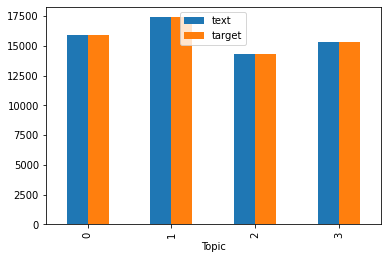

In [6]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [7]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [8]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [10]:
X = list(map(tweet_to_words, df_news['text']))


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [12]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
3


In [13]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [14]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [15]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [17]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_4.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_4.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [18]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 4)
Validation Set -> (12593, 50) (12593, 4)
Test Set -> (12593, 50) (12593, 4)


In [19]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [20]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



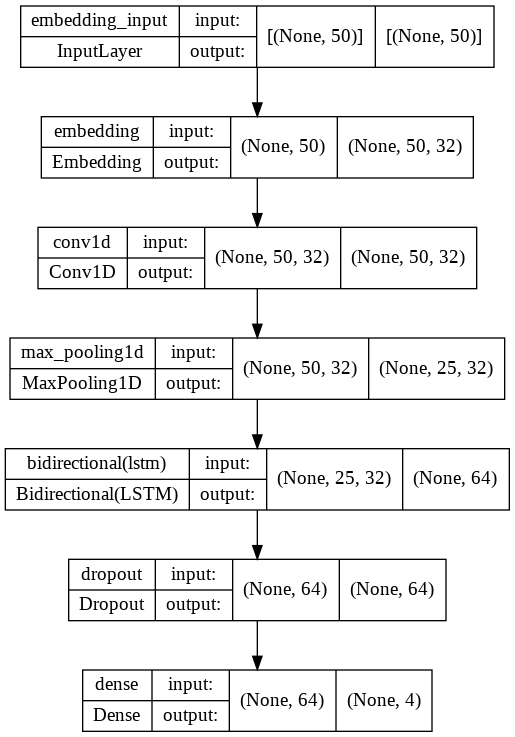

In [21]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [23]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [24]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 45s 67ms/step - loss: 1.1779 - accuracy: 0.4366 - precision: 0.7524 - recall: 0.1572 - val_loss: 0.9105 - val_accuracy: 0.6064 - val_precision: 0.7491 - val_recall: 0.3964
Epoch 2/500
591/591 [==============================] - 30s 51ms/step - loss: 0.7814 - accuracy: 0.6873 - precision: 0.7718 - recall: 0.5693 - val_loss: 0.5983 - val_accuracy: 0.7662 - val_precision: 0.8166 - val_recall: 0.7076
Epoch 3/500
591/591 [==============================] - 26s 44ms/step - loss: 0.5291 - accuracy: 0.7990 - precision: 0.8370 - recall: 0.7547 - val_loss: 0.6036 - val_accuracy: 0.7649 - val_precision: 0.7925 - val_recall: 0.7351
Epoch 4/500
591/591 [==============================] - 26s 45ms/step - loss: 0.4210 - accuracy: 0.8410 - precision: 0.8666 - recall: 0.8144 - val_loss: 0.4869 - val_accuracy: 0.8127 - val_precision: 0.8370 - val_recall: 0.7870
Epoch 5/500
591/591 [==============================] - 35s 59ms/step - loss: 0.3569 - accura

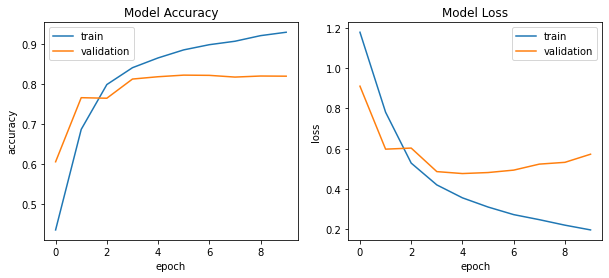

In [25]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

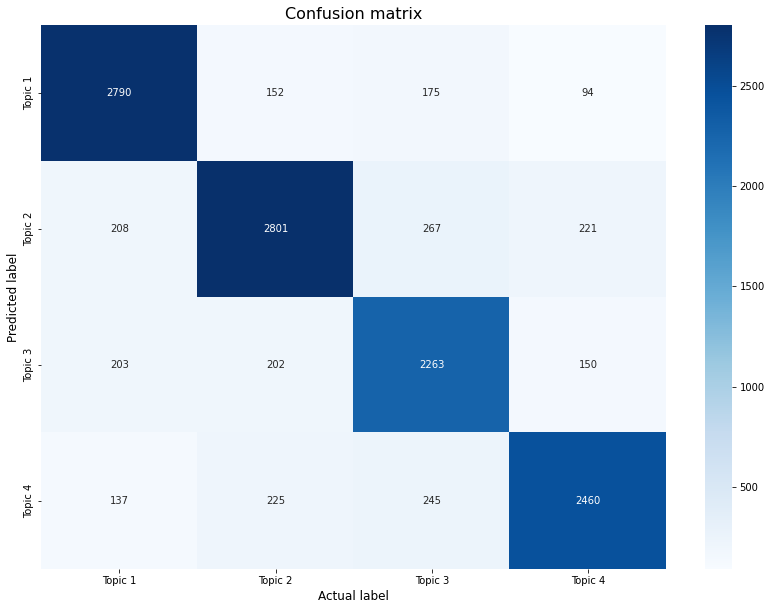

In [26]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [27]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_4.h5')
print('Best model saved')

Best model saved


# **Topic 8**

In [28]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_8.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      3
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative      0
3      harassment in office  dm seeks action taken re...  Negative      2
4                    two students end their lives mumbai  Negative      1
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      2
62960  going to india gate tonight? you could be in f...  Positive      6
62961  ; cops to ensure safe new year celebrations in...  Positive      1
62962  ten more private trains from mumbai on cards m...  Positive      2
62963  a trip to a tribal village with super cop vija...  Positive      2

[62964 rows x 3 columns]

In [29]:
df_news['Topic'].value_counts()

1    9507
0    9046
3    8938
6    7812
2    7653
4    7145
7    6845
5    6018
Name: Topic, dtype: int64

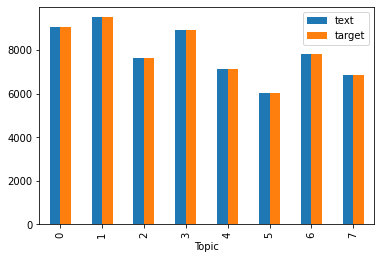

In [30]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [31]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [32]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [34]:
X = list(map(tweet_to_words, df_news['text']))


In [35]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [36]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
3


In [37]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [38]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [39]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [40]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [41]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_8.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_8.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [42]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 8)
Validation Set -> (12593, 50) (12593, 8)
Test Set -> (12593, 50) (12593, 8)


In [43]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [44]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(8, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



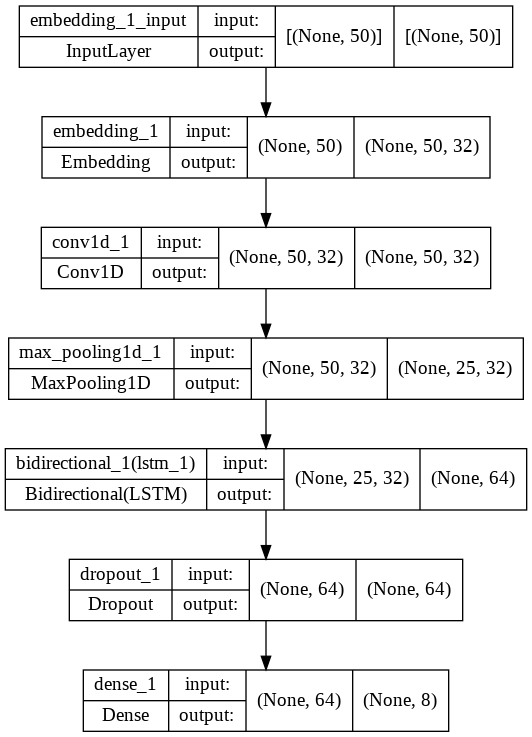

In [45]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [46]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [47]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [48]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 27s 36ms/step - loss: 1.9122 - accuracy: 0.2498 - precision_1: 0.8057 - recall_1: 0.0551 - val_loss: 1.5441 - val_accuracy: 0.4197 - val_precision_1: 0.7406 - val_recall_1: 0.2156
Epoch 2/500
591/591 [==============================] - 19s 33ms/step - loss: 1.3909 - accuracy: 0.5135 - precision_1: 0.7878 - recall_1: 0.2842 - val_loss: 1.1904 - val_accuracy: 0.5975 - val_precision_1: 0.8090 - val_recall_1: 0.3881
Epoch 3/500
591/591 [==============================] - 19s 32ms/step - loss: 1.0897 - accuracy: 0.6372 - precision_1: 0.7865 - recall_1: 0.4752 - val_loss: 0.9826 - val_accuracy: 0.6678 - val_precision_1: 0.7878 - val_recall_1: 0.5475
Epoch 4/500
591/591 [==============================] - 20s 33ms/step - loss: 0.8956 - accuracy: 0.6997 - precision_1: 0.7968 - recall_1: 0.5928 - val_loss: 0.8826 - val_accuracy: 0.6959 - val_precision_1: 0.7896 - val_recall_1: 0.6125
Epoch 5/500
591/591 [==============================] - 19s 3

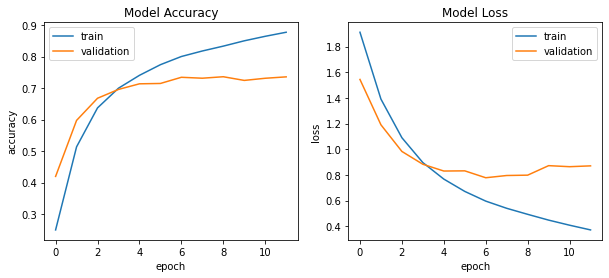

In [49]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

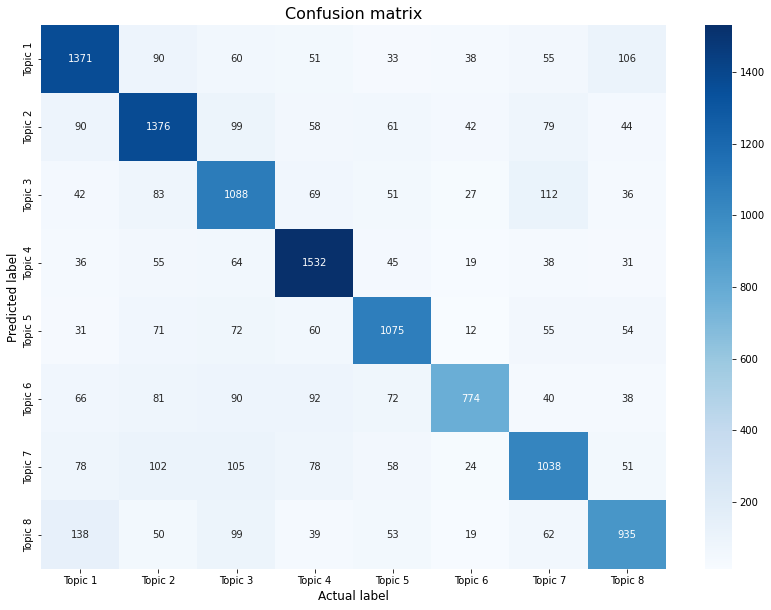

In [50]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [51]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_8.h5')
print('Best model saved')

Best model saved


# **Topic 10**

In [52]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_10.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      6
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative      2
3      harassment in office  dm seeks action taken re...  Negative      8
4                    two students end their lives mumbai  Negative      6
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      0
62960  going to india gate tonight? you could be in f...  Positive      5
62961  ; cops to ensure safe new year celebrations in...  Positive      6
62962  ten more private trains from mumbai on cards m...  Positive      6
62963  a trip to a tribal village with super cop vija...  Positive      0

[62964 rows x 3 columns]

In [53]:
df_news['Topic'].value_counts()

2    8447
9    7902
1    7520
5    7193
0    6168
3    5865
7    5571
6    5125
8    4689
4    4484
Name: Topic, dtype: int64

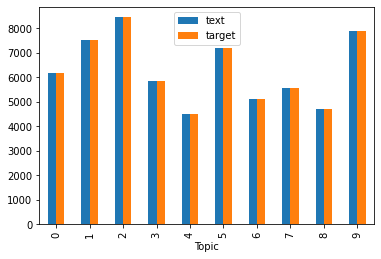

In [54]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [55]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [56]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [58]:
X = list(map(tweet_to_words, df_news['text']))


In [59]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [60]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
6


In [61]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [62]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [63]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [64]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [65]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_10.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_10.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [66]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 10)
Validation Set -> (12593, 50) (12593, 10)
Test Set -> (12593, 50) (12593, 10)


In [67]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [68]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



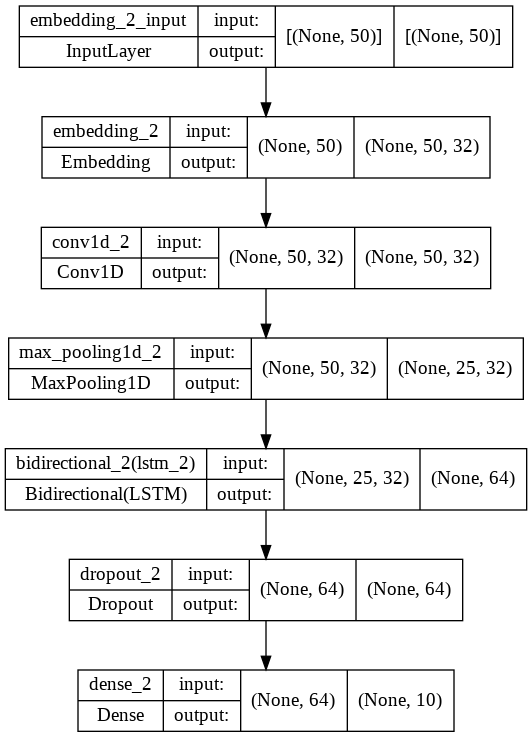

In [69]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [70]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [71]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [72]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 25s 35ms/step - loss: 2.1234 - accuracy: 0.2256 - precision_2: 0.8389 - recall_2: 0.0601 - val_loss: 1.8340 - val_accuracy: 0.3271 - val_precision_2: 0.8792 - val_recall_2: 0.1548
Epoch 2/500
591/591 [==============================] - 21s 35ms/step - loss: 1.7007 - accuracy: 0.4148 - precision_2: 0.8074 - recall_2: 0.2021 - val_loss: 1.4823 - val_accuracy: 0.5061 - val_precision_2: 0.7741 - val_recall_2: 0.3325
Epoch 3/500
591/591 [==============================] - 19s 32ms/step - loss: 1.3825 - accuracy: 0.5589 - precision_2: 0.7939 - recall_2: 0.3693 - val_loss: 1.2473 - val_accuracy: 0.5932 - val_precision_2: 0.7668 - val_recall_2: 0.4514
Epoch 4/500
591/591 [==============================] - 19s 32ms/step - loss: 1.1576 - accuracy: 0.6314 - precision_2: 0.7997 - recall_2: 0.4793 - val_loss: 1.0736 - val_accuracy: 0.6535 - val_precision_2: 0.7890 - val_recall_2: 0.5290
Epoch 5/500
591/591 [==============================] - 19s 3

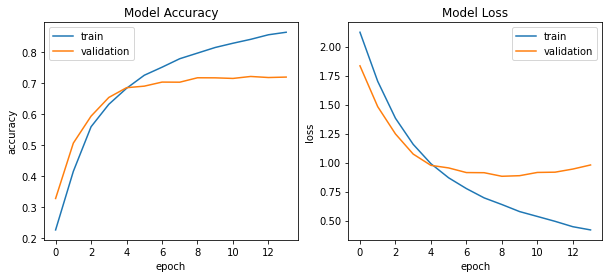

In [73]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

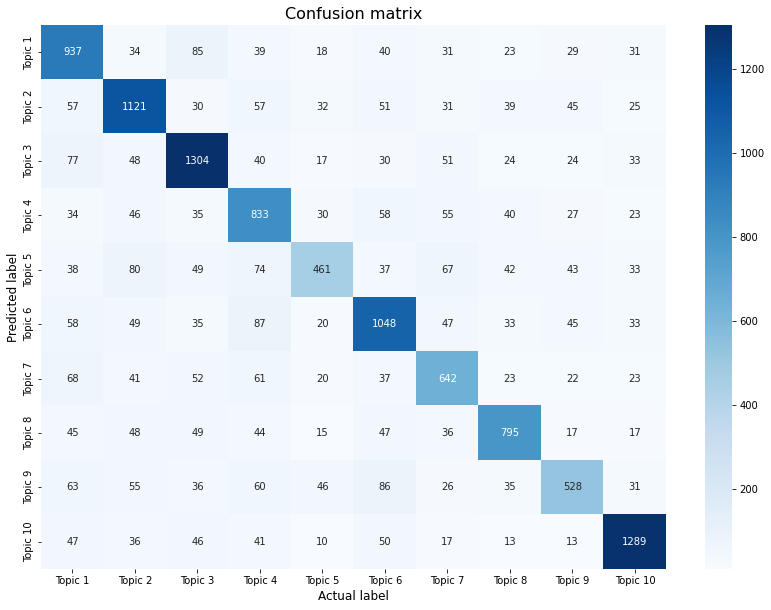

In [74]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [75]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_10.h5')
print('Best model saved')

Best model saved


# **Topic 12**

In [76]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_12.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      5
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative     10
3      harassment in office  dm seeks action taken re...  Negative      5
4                    two students end their lives mumbai  Negative     11
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive     11
62960  going to india gate tonight? you could be in f...  Positive      2
62961  ; cops to ensure safe new year celebrations in...  Positive     11
62962  ten more private trains from mumbai on cards m...  Positive     11
62963  a trip to a tribal village with super cop vija...  Positive      3

[62964 rows x 3 columns]

In [77]:
df_news['Topic'].value_counts()

10    6266
2     6128
4     5858
5     5828
6     5756
11    5474
1     5185
7     4869
9     4823
0     4336
3     4243
8     4198
Name: Topic, dtype: int64

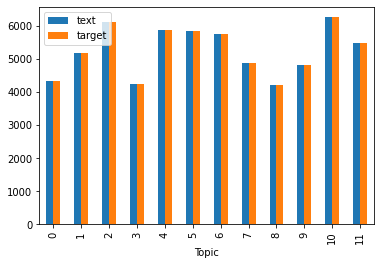

In [78]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [79]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [80]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [82]:
X = list(map(tweet_to_words, df_news['text']))


In [83]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [84]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
5


In [85]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [86]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [87]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [88]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [89]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_12.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_12.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [90]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 12)
Validation Set -> (12593, 50) (12593, 12)
Test Set -> (12593, 50) (12593, 12)


In [91]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [92]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(12, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



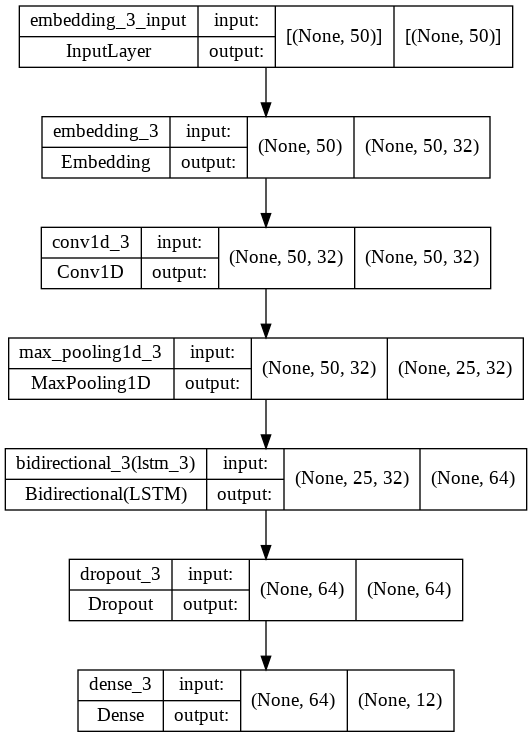

In [93]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [94]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [95]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [96]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 26s 37ms/step - loss: 2.3403 - accuracy: 0.1725 - precision_3: 0.8440 - recall_3: 0.0312 - val_loss: 2.0578 - val_accuracy: 0.2633 - val_precision_3: 0.9265 - val_recall_3: 0.1061
Epoch 2/500
591/591 [==============================] - 18s 31ms/step - loss: 1.8933 - accuracy: 0.3461 - precision_3: 0.8644 - recall_3: 0.1559 - val_loss: 1.7056 - val_accuracy: 0.4233 - val_precision_3: 0.8322 - val_recall_3: 0.2289
Epoch 3/500
591/591 [==============================] - 18s 31ms/step - loss: 1.5857 - accuracy: 0.4787 - precision_3: 0.8202 - recall_3: 0.2669 - val_loss: 1.4163 - val_accuracy: 0.5602 - val_precision_3: 0.8149 - val_recall_3: 0.3657
Epoch 4/500
591/591 [==============================] - 18s 31ms/step - loss: 1.3115 - accuracy: 0.5907 - precision_3: 0.8126 - recall_3: 0.4106 - val_loss: 1.2601 - val_accuracy: 0.6080 - val_precision_3: 0.8270 - val_recall_3: 0.4400
Epoch 5/500
591/591 [==============================] - 18s 3

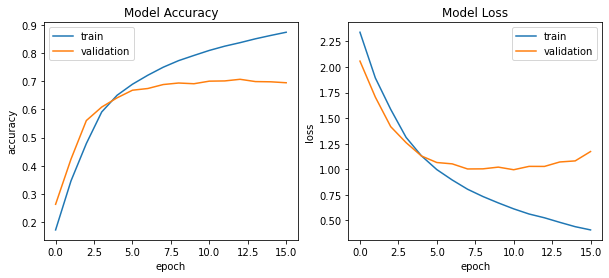

In [97]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

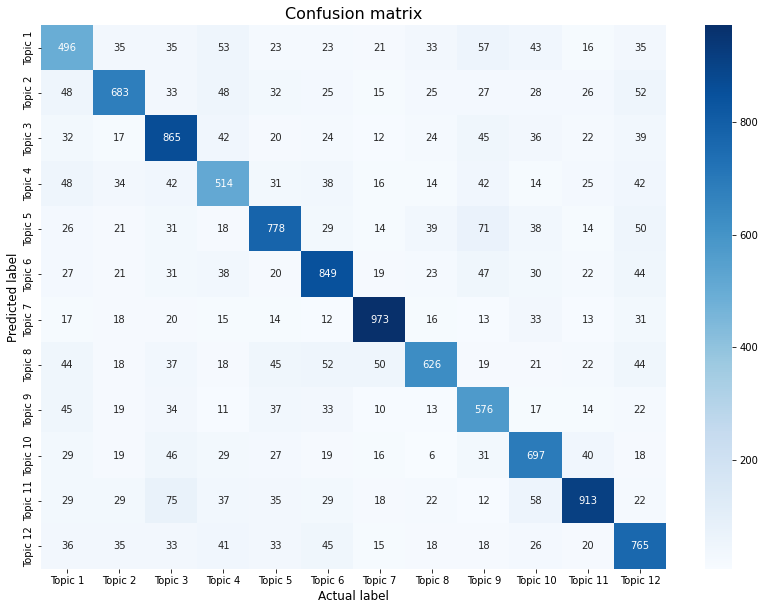

In [98]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [99]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_12.h5')
print('Best model saved')

Best model saved


# **Topic 14**

In [100]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_14.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      6
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative      0
3      harassment in office  dm seeks action taken re...  Negative      8
4                    two students end their lives mumbai  Negative      8
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive     13
62960  going to india gate tonight? you could be in f...  Positive      3
62961  ; cops to ensure safe new year celebrations in...  Positive      7
62962  ten more private trains from mumbai on cards m...  Positive      4
62963  a trip to a tribal village with super cop vija...  Positive     10

[62964 rows x 3 columns]

In [101]:
df_news['Topic'].value_counts()

0     8002
3     5956
2     5611
6     4774
1     4754
10    4196
13    4158
5     3968
7     3819
4     3721
12    3721
8     3648
11    3403
9     3233
Name: Topic, dtype: int64

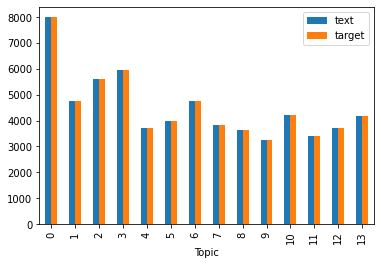

In [102]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [103]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [104]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [106]:
X = list(map(tweet_to_words, df_news['text']))


In [107]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [108]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
6


In [109]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [110]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [111]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [112]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [113]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_14.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_14.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [114]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 14)
Validation Set -> (12593, 50) (12593, 14)
Test Set -> (12593, 50) (12593, 14)


In [115]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [116]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(14, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



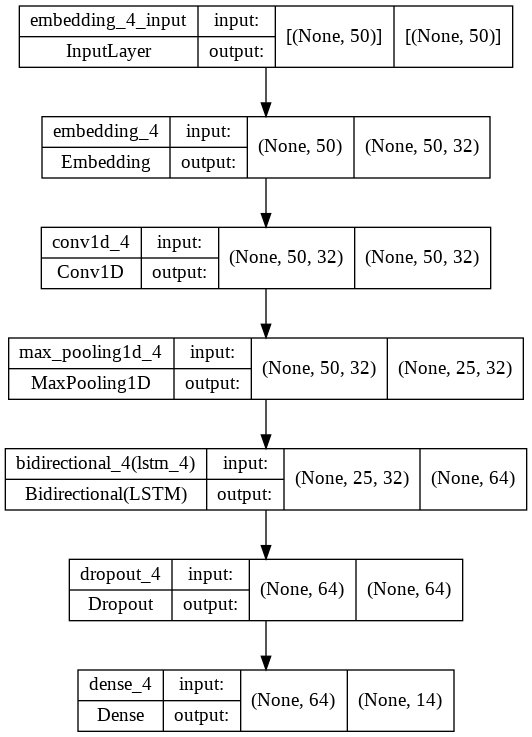

In [117]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [118]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [119]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [120]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 26s 37ms/step - loss: 2.3933 - accuracy: 0.2080 - precision_4: 0.8449 - recall_4: 0.0737 - val_loss: 2.0497 - val_accuracy: 0.3490 - val_precision_4: 0.8849 - val_recall_4: 0.1587
Epoch 2/500
591/591 [==============================] - 20s 35ms/step - loss: 1.8647 - accuracy: 0.4182 - precision_4: 0.8425 - recall_4: 0.2322 - val_loss: 1.6016 - val_accuracy: 0.5219 - val_precision_4: 0.8202 - val_recall_4: 0.3107
Epoch 3/500
591/591 [==============================] - 18s 31ms/step - loss: 1.5286 - accuracy: 0.5457 - precision_4: 0.8203 - recall_4: 0.3436 - val_loss: 1.3379 - val_accuracy: 0.6162 - val_precision_4: 0.8347 - val_recall_4: 0.4114
Epoch 4/500
591/591 [==============================] - 18s 31ms/step - loss: 1.2790 - accuracy: 0.6274 - precision_4: 0.8238 - recall_4: 0.4514 - val_loss: 1.1802 - val_accuracy: 0.6552 - val_precision_4: 0.7980 - val_recall_4: 0.5251
Epoch 5/500
591/591 [==============================] - 18s 3

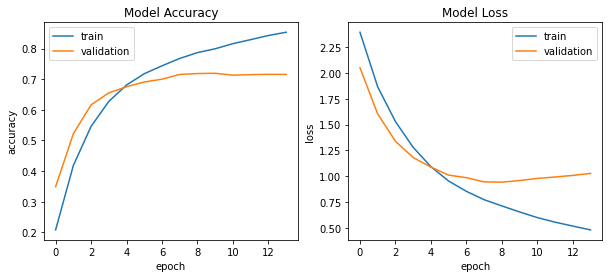

In [121]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

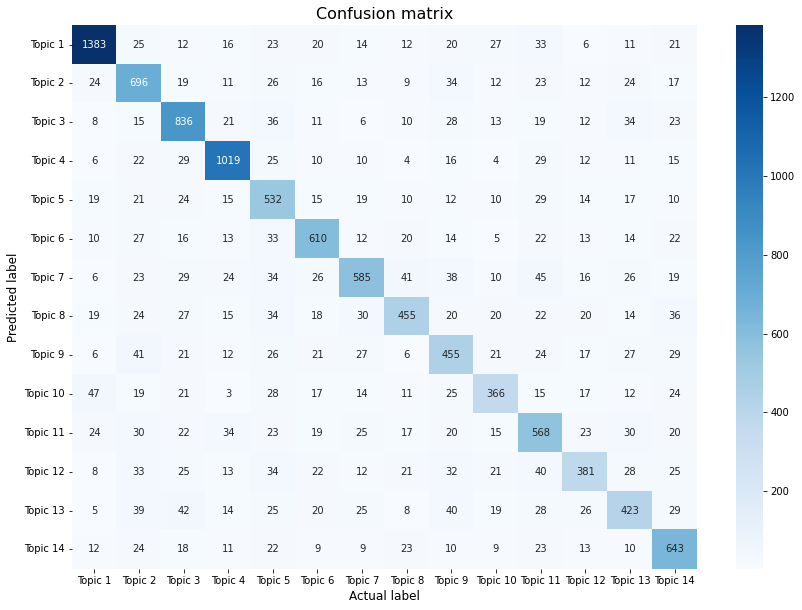

In [122]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [123]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_14.h5')
print('Best model saved')

Best model saved


# **Topic 18**

In [124]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_18.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative     15
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative     16
3      harassment in office  dm seeks action taken re...  Negative      2
4                    two students end their lives mumbai  Negative      2
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      0
62960  going to india gate tonight? you could be in f...  Positive     10
62961  ; cops to ensure safe new year celebrations in...  Positive      1
62962  ten more private trains from mumbai on cards m...  Positive      1
62963  a trip to a tribal village with super cop vija...  Positive     15

[62964 rows x 3 columns]

In [125]:
df_news['Topic'].value_counts()

12    5825
10    5089
16    4982
9     4944
1     4713
13    4091
14    3545
2     3386
6     3249
5     3141
17    2739
4     2712
15    2587
8     2473
3     2468
7     2448
0     2370
11    2202
Name: Topic, dtype: int64

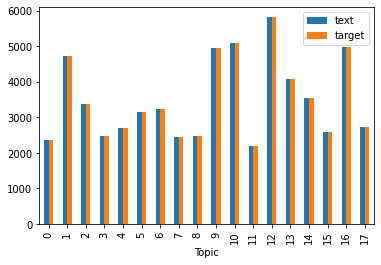

In [126]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [127]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [128]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [130]:
X = list(map(tweet_to_words, df_news['text']))


In [131]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [132]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
15


In [133]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [134]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [135]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [136]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [137]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_18.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_18.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [138]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 18)
Validation Set -> (12593, 50) (12593, 18)
Test Set -> (12593, 50) (12593, 18)


In [139]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [140]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(18, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



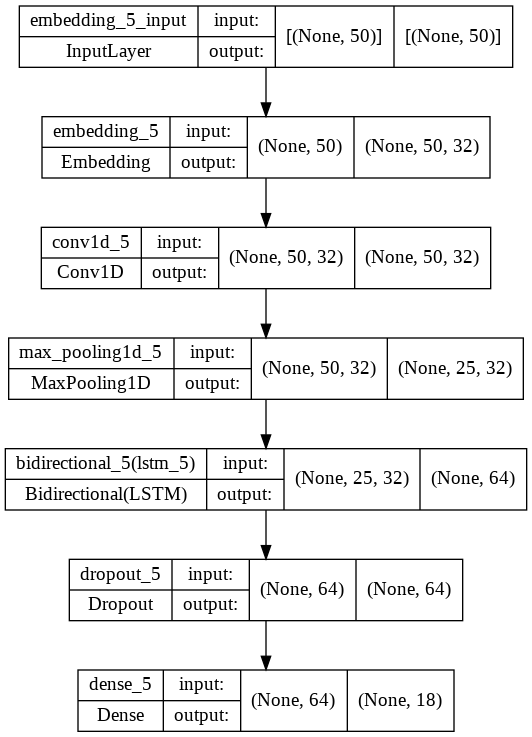

In [141]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [142]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [143]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [144]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 24s 33ms/step - loss: 2.6963 - accuracy: 0.1644 - precision_5: 0.8131 - recall_5: 0.0354 - val_loss: 2.1738 - val_accuracy: 0.3470 - val_precision_5: 0.8832 - val_recall_5: 0.1855
Epoch 2/500
591/591 [==============================] - 18s 31ms/step - loss: 2.0369 - accuracy: 0.4060 - precision_5: 0.8372 - recall_5: 0.2226 - val_loss: 1.8085 - val_accuracy: 0.4921 - val_precision_5: 0.8807 - val_recall_5: 0.2783
Epoch 3/500
591/591 [==============================] - 20s 34ms/step - loss: 1.7300 - accuracy: 0.5136 - precision_5: 0.8280 - recall_5: 0.3299 - val_loss: 1.5855 - val_accuracy: 0.5644 - val_precision_5: 0.7923 - val_recall_5: 0.4229
Epoch 4/500
591/591 [==============================] - 18s 31ms/step - loss: 1.5203 - accuracy: 0.5718 - precision_5: 0.8282 - recall_5: 0.4062 - val_loss: 1.4392 - val_accuracy: 0.5945 - val_precision_5: 0.7986 - val_recall_5: 0.4568
Epoch 5/500
591/591 [==============================] - 18s 3

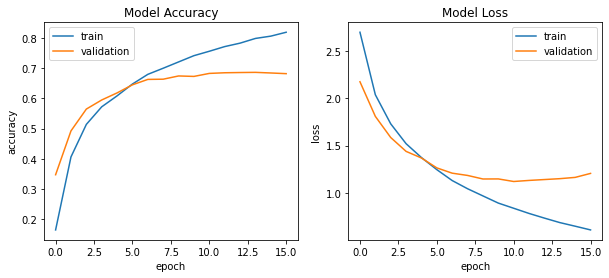

In [145]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

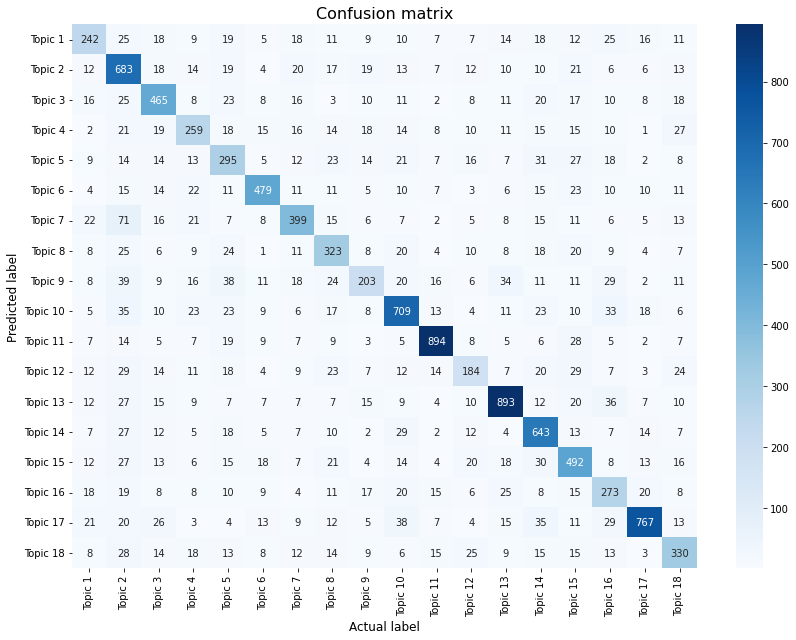

In [146]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [147]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_18.h5')
print('Best model saved')

Best model saved


# **Topic 20**

In [148]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_20.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      6
1      bhujbal says higher power rate driving industr...  Negative     13
2      mandira bedi shares a monochrome picture in a ...  Negative     16
3      harassment in office  dm seeks action taken re...  Negative     18
4                    two students end their lives mumbai  Negative     14
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      5
62960  going to india gate tonight? you could be in f...  Positive      9
62961  ; cops to ensure safe new year celebrations in...  Positive      6
62962  ten more private trains from mumbai on cards m...  Positive      6
62963  a trip to a tribal village with super cop vija...  Positive      5

[62964 rows x 3 columns]

In [149]:
df_news['Topic'].value_counts()

3     5622
16    4750
7     4718
9     3716
14    3547
0     3403
1     3397
12    3261
5     3206
13    3119
18    3100
11    3050
6     2815
4     2801
8     2489
2     2422
10    2030
15    2020
17    1820
19    1678
Name: Topic, dtype: int64

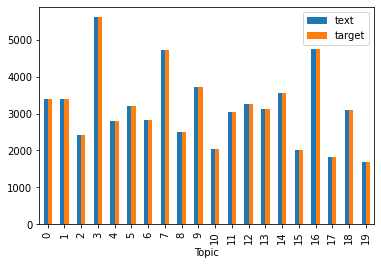

In [150]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [151]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [152]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [153]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [154]:
X = list(map(tweet_to_words, df_news['text']))


In [155]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [156]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
6


In [157]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [158]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [159]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [160]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [161]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_20.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_20.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [162]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 20)
Validation Set -> (12593, 50) (12593, 20)
Test Set -> (12593, 50) (12593, 20)


In [163]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [164]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(20, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



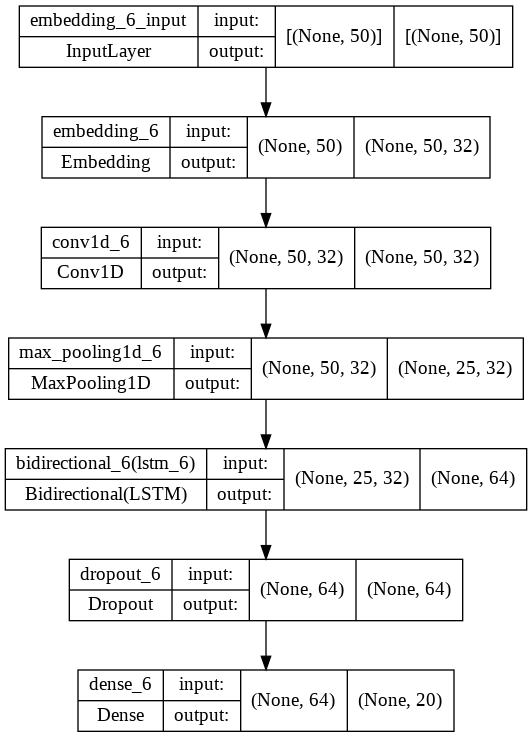

In [165]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [166]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [167]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [168]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 24s 33ms/step - loss: 2.7857 - accuracy: 0.1547 - precision_6: 0.7992 - recall_6: 0.0253 - val_loss: 2.3766 - val_accuracy: 0.2890 - val_precision_6: 0.8847 - val_recall_6: 0.1481
Epoch 2/500
591/591 [==============================] - 20s 34ms/step - loss: 2.2243 - accuracy: 0.3369 - precision_6: 0.8453 - recall_6: 0.1864 - val_loss: 1.9953 - val_accuracy: 0.4134 - val_precision_6: 0.8396 - val_recall_6: 0.2578
Epoch 3/500
591/591 [==============================] - 18s 31ms/step - loss: 1.8632 - accuracy: 0.4782 - precision_6: 0.8404 - recall_6: 0.2869 - val_loss: 1.6732 - val_accuracy: 0.5379 - val_precision_6: 0.8278 - val_recall_6: 0.3589
Epoch 4/500
591/591 [==============================] - 18s 31ms/step - loss: 1.6232 - accuracy: 0.5461 - precision_6: 0.8349 - recall_6: 0.3625 - val_loss: 1.5136 - val_accuracy: 0.5819 - val_precision_6: 0.8340 - val_recall_6: 0.4144
Epoch 5/500
591/591 [==============================] - 18s 3

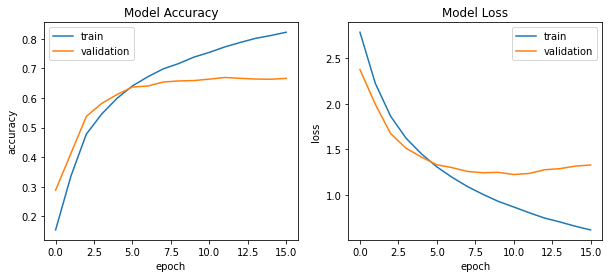

In [169]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

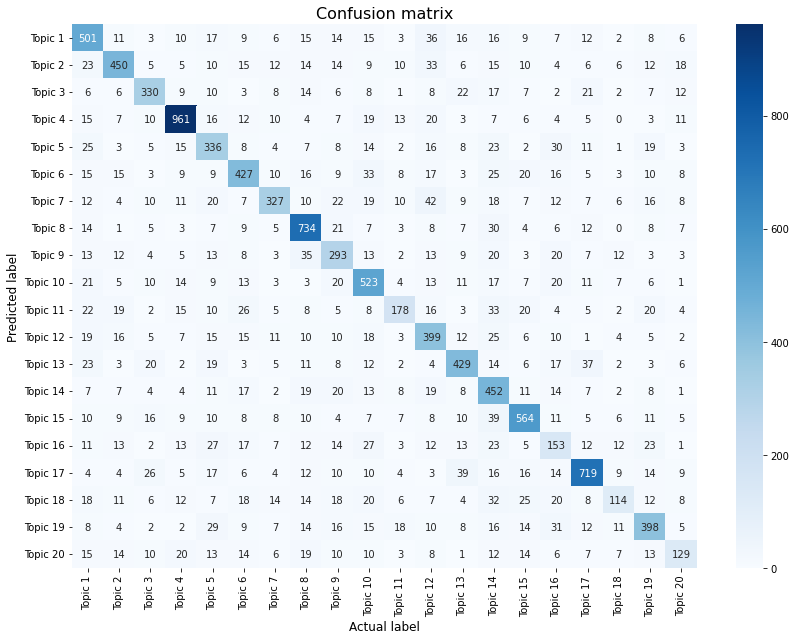

In [170]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [171]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_20.h5')
print('Best model saved')

Best model saved


# **Topic 24**

In [172]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_24.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative     22
1      bhujbal says higher power rate driving industr...  Negative      4
2      mandira bedi shares a monochrome picture in a ...  Negative     11
3      harassment in office  dm seeks action taken re...  Negative      2
4                    two students end their lives mumbai  Negative      8
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      4
62960  going to india gate tonight? you could be in f...  Positive     12
62961  ; cops to ensure safe new year celebrations in...  Positive     15
62962  ten more private trains from mumbai on cards m...  Positive     13
62963  a trip to a tribal village with super cop vija...  Positive     22

[62964 rows x 3 columns]

In [173]:
df_news['Topic'].value_counts()

11    4417
20    4398
12    3790
13    3786
2     3495
9     3390
1     3341
16    3138
8     3117
17    2574
18    2437
19    2382
0     2370
15    2331
5     2319
4     2065
14    1925
6     1913
10    1770
21    1716
23    1617
3     1580
22    1550
7     1543
Name: Topic, dtype: int64

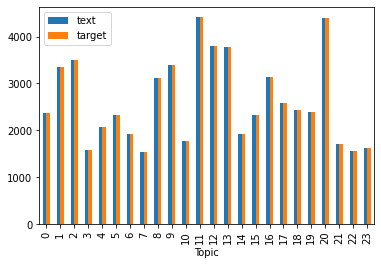

In [174]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [175]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [176]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [178]:
X = list(map(tweet_to_words, df_news['text']))


In [179]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [180]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
22


In [181]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [182]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [183]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [184]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [185]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_24.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_24.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [186]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 24)
Validation Set -> (12593, 50) (12593, 24)
Test Set -> (12593, 50) (12593, 24)


In [187]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [188]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(24, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



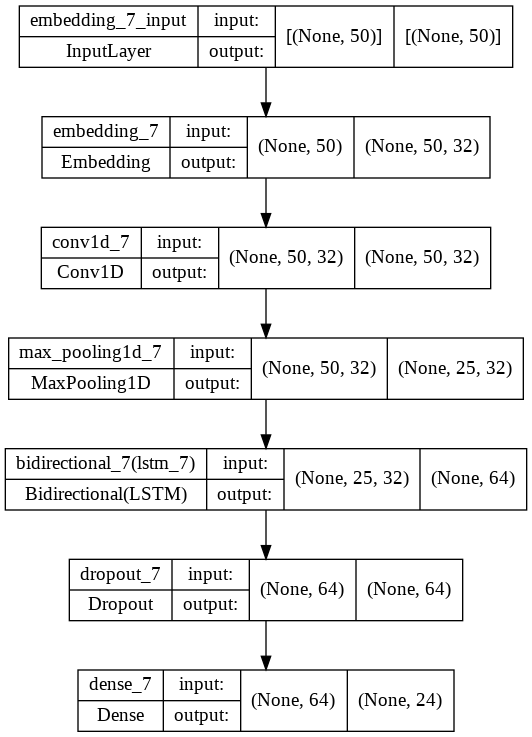

In [189]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [190]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [191]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [192]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 24s 33ms/step - loss: 2.8609 - accuracy: 0.1634 - precision_7: 0.8222 - recall_7: 0.0475 - val_loss: 2.5803 - val_accuracy: 0.2359 - val_precision_7: 0.6671 - val_recall_7: 0.1466
Epoch 2/500
591/591 [==============================] - 18s 31ms/step - loss: 2.1909 - accuracy: 0.3997 - precision_7: 0.8402 - recall_7: 0.2180 - val_loss: 1.8717 - val_accuracy: 0.5196 - val_precision_7: 0.8520 - val_recall_7: 0.3461
Epoch 3/500
591/591 [==============================] - 21s 35ms/step - loss: 1.8490 - accuracy: 0.5250 - precision_7: 0.8322 - recall_7: 0.3432 - val_loss: 1.7184 - val_accuracy: 0.5520 - val_precision_7: 0.8270 - val_recall_7: 0.4047
Epoch 4/500
591/591 [==============================] - 19s 31ms/step - loss: 1.6427 - accuracy: 0.5720 - precision_7: 0.8362 - recall_7: 0.4092 - val_loss: 1.5654 - val_accuracy: 0.5914 - val_precision_7: 0.8230 - val_recall_7: 0.4522
Epoch 5/500
591/591 [==============================] - 19s 3

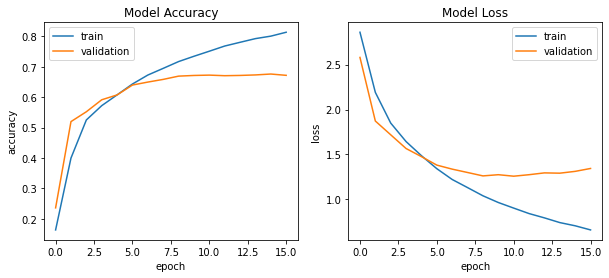

In [193]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

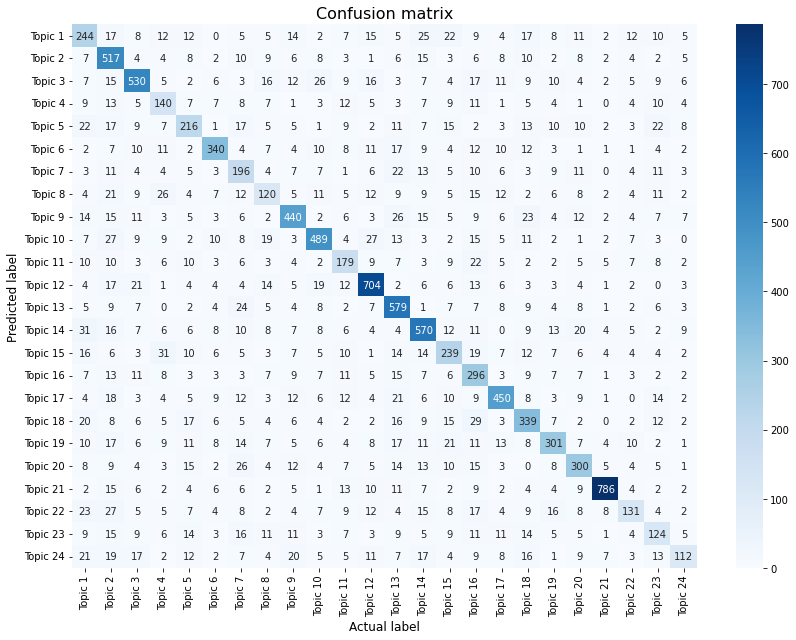

In [194]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [195]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_24.h5')
print('Best model saved')

Best model saved


# **Topic 28**

In [196]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_28.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative      1
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative      6
3      harassment in office  dm seeks action taken re...  Negative      8
4                    two students end their lives mumbai  Negative     11
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive     11
62960  going to india gate tonight? you could be in f...  Positive      1
62961  ; cops to ensure safe new year celebrations in...  Positive     25
62962  ten more private trains from mumbai on cards m...  Positive     25
62963  a trip to a tribal village with super cop vija...  Positive     21

[62964 rows x 3 columns]

In [197]:
df_news['Topic'].value_counts()

6     5638
12    4739
3     4514
26    4471
1     3195
25    2569
2     2567
16    2512
14    2458
24    2393
10    2069
5     2013
11    2000
8     1991
15    1968
19    1860
13    1815
4     1772
9     1580
27    1523
21    1350
22    1343
0     1221
20    1170
23    1146
7     1059
17    1027
18    1001
Name: Topic, dtype: int64

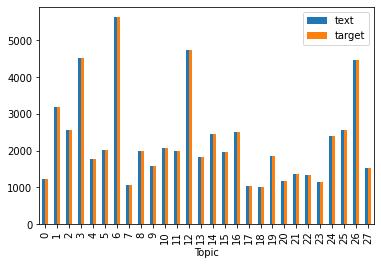

In [198]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [199]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [200]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [201]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [202]:
X = list(map(tweet_to_words, df_news['text']))


In [203]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [204]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
1


In [205]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [206]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [207]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [208]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [209]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_28.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_28.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [210]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 28)
Validation Set -> (12593, 50) (12593, 28)
Test Set -> (12593, 50) (12593, 28)


In [211]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [212]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(28, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



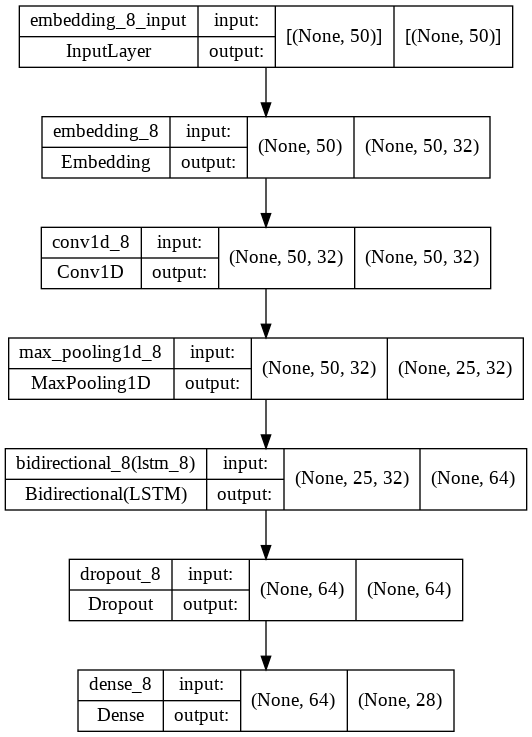

In [213]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [214]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [215]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [216]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 24s 33ms/step - loss: 2.9683 - accuracy: 0.1787 - precision_8: 0.7854 - recall_8: 0.0542 - val_loss: 2.5820 - val_accuracy: 0.2878 - val_precision_8: 0.9151 - val_recall_8: 0.1575
Epoch 2/500
591/591 [==============================] - 18s 31ms/step - loss: 2.3891 - accuracy: 0.3489 - precision_8: 0.8598 - recall_8: 0.1916 - val_loss: 2.1266 - val_accuracy: 0.4239 - val_precision_8: 0.8903 - val_recall_8: 0.2411
Epoch 3/500
591/591 [==============================] - 20s 34ms/step - loss: 2.0314 - accuracy: 0.4720 - precision_8: 0.8378 - recall_8: 0.2780 - val_loss: 1.8049 - val_accuracy: 0.5566 - val_precision_8: 0.8362 - val_recall_8: 0.3677
Epoch 4/500
591/591 [==============================] - 18s 31ms/step - loss: 1.7941 - accuracy: 0.5632 - precision_8: 0.8254 - recall_8: 0.3714 - val_loss: 1.6419 - val_accuracy: 0.6049 - val_precision_8: 0.8349 - val_recall_8: 0.4310
Epoch 5/500
591/591 [==============================] - 18s 3

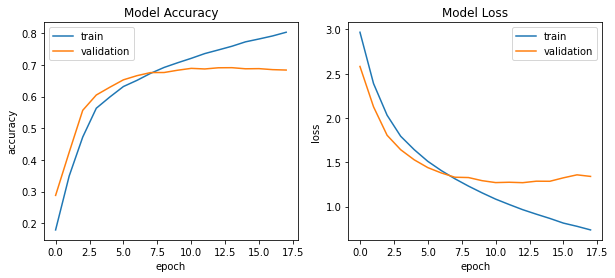

In [217]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

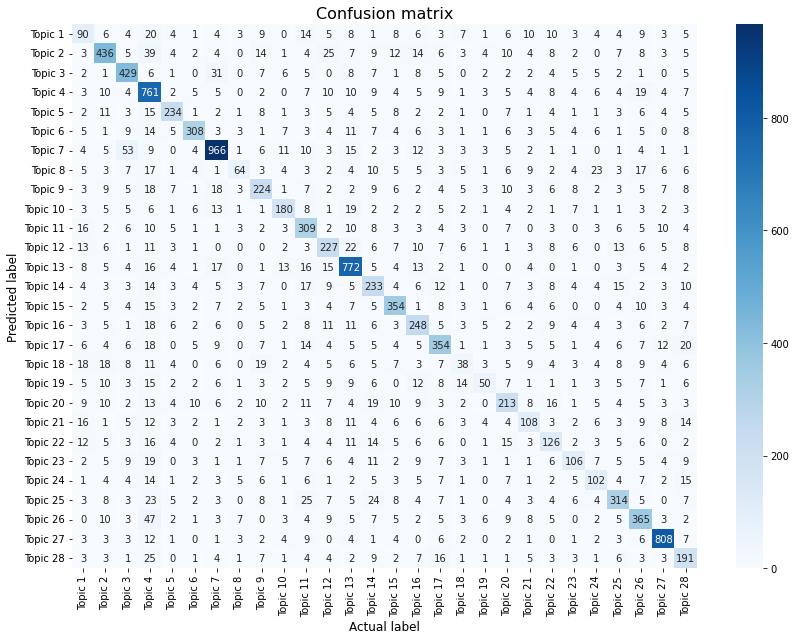

In [218]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24', 'Topic 25', 'Topic 26', 'Topic 27', 'Topic 28']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [219]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_28.h5')
print('Best model saved')

Best model saved


# **Topic 32**

In [220]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_32.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative     28
1      bhujbal says higher power rate driving industr...  Negative      4
2      mandira bedi shares a monochrome picture in a ...  Negative     14
3      harassment in office  dm seeks action taken re...  Negative      8
4                    two students end their lives mumbai  Negative     24
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive      5
62960  going to india gate tonight? you could be in f...  Positive     24
62961  ; cops to ensure safe new year celebrations in...  Positive      6
62962  ten more private trains from mumbai on cards m...  Positive      6
62963  a trip to a tribal village with super cop vija...  Positive     22

[62964 rows x 3 columns]

In [221]:
df_news['Topic'].value_counts()

9     4703
16    4221
2     3916
24    3468
10    3374
13    3286
26    2863
1     2502
0     2366
21    2269
22    2222
6     1965
23    1886
3     1801
29    1793
18    1787
4     1743
28    1743
19    1685
15    1673
14    1624
8     1378
17    1288
11    1211
25    1036
31    1033
7      892
12     774
5      768
27     714
20     536
30     444
Name: Topic, dtype: int64

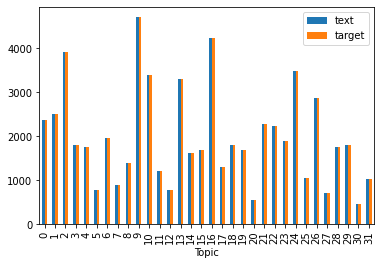

In [222]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [223]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [224]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [225]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [226]:
X = list(map(tweet_to_words, df_news['text']))


In [227]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [228]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
28


In [229]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [230]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [231]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [232]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [233]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_32.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_32.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [234]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 32)
Validation Set -> (12593, 50) (12593, 32)
Test Set -> (12593, 50) (12593, 32)


In [235]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [236]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



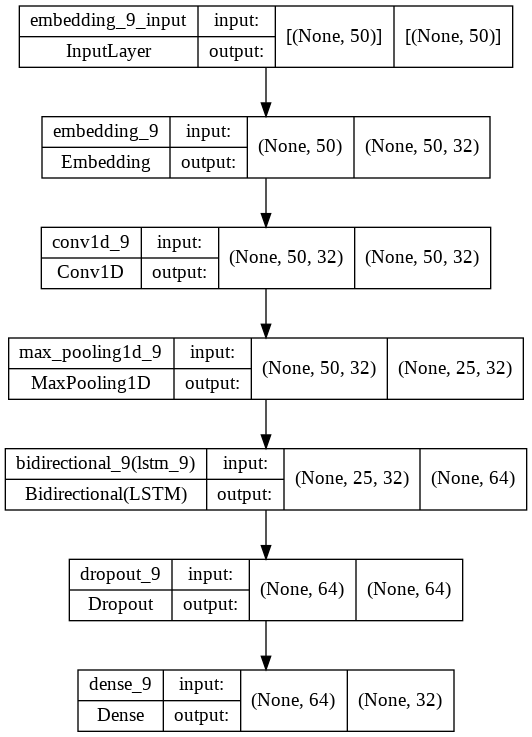

In [237]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [238]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [239]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [240]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 25s 33ms/step - loss: 3.1024 - accuracy: 0.1461 - precision_9: 0.7728 - recall_9: 0.0272 - val_loss: 2.6324 - val_accuracy: 0.2863 - val_precision_9: 0.8711 - val_recall_9: 0.1197
Epoch 2/500
591/591 [==============================] - 18s 31ms/step - loss: 2.3974 - accuracy: 0.3665 - precision_9: 0.8492 - recall_9: 0.1902 - val_loss: 2.0567 - val_accuracy: 0.4719 - val_precision_9: 0.8903 - val_recall_9: 0.2675
Epoch 3/500
591/591 [==============================] - 18s 31ms/step - loss: 2.0055 - accuracy: 0.5102 - precision_9: 0.8410 - recall_9: 0.3121 - val_loss: 1.7738 - val_accuracy: 0.5880 - val_precision_9: 0.8568 - val_recall_9: 0.4029
Epoch 4/500
591/591 [==============================] - 19s 31ms/step - loss: 1.7796 - accuracy: 0.5822 - precision_9: 0.8368 - recall_9: 0.4058 - val_loss: 1.6427 - val_accuracy: 0.6109 - val_precision_9: 0.8349 - val_recall_9: 0.4641
Epoch 5/500
591/591 [==============================] - 19s 3

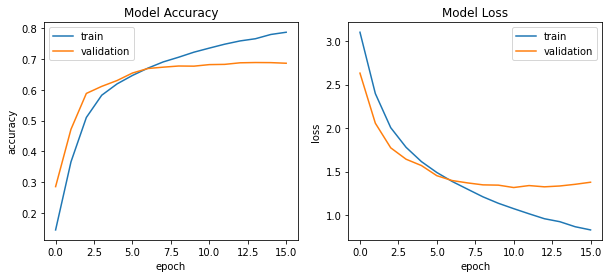

In [241]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

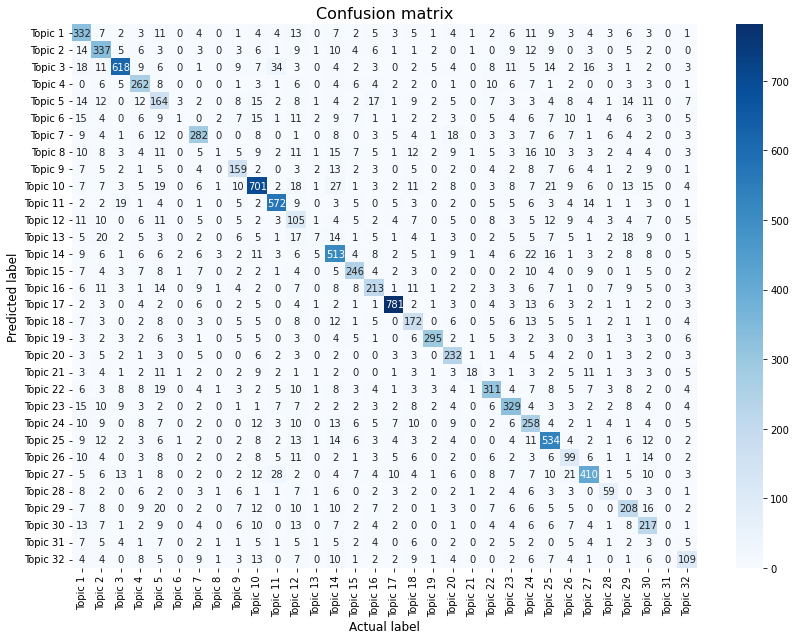

In [242]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24','Topic 25', 'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29', 'Topic 30', 'Topic 31', 'Topic 32']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [243]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_32.h5')
print('Best model saved')

Best model saved


# **Topic 36**

In [244]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_36.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative     34
1      bhujbal says higher power rate driving industr...  Negative      7
2      mandira bedi shares a monochrome picture in a ...  Negative     18
3      harassment in office  dm seeks action taken re...  Negative      8
4                    two students end their lives mumbai  Negative     33
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive     20
62960  going to india gate tonight? you could be in f...  Positive     10
62961  ; cops to ensure safe new year celebrations in...  Positive     32
62962  ten more private trains from mumbai on cards m...  Positive     32
62963  a trip to a tribal village with super cop vija...  Positive     14

[62964 rows x 3 columns]

In [245]:
df_news['Topic'].value_counts()

26    4952
24    4164
30    4089
27    2808
22    2598
10    2443
1     2125
17    2073
20    2059
13    2042
32    1942
3     1802
8     1708
29    1619
0     1614
2     1612
5     1571
9     1566
28    1542
19    1513
12    1462
18    1458
33    1408
35    1348
16    1174
7     1149
23    1135
25    1014
34     937
21     928
15     923
14     883
6      872
31     844
11     797
4      790
Name: Topic, dtype: int64

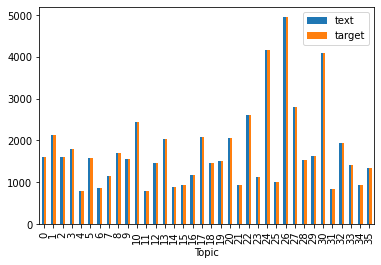

In [246]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [247]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [248]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [249]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [250]:
X = list(map(tweet_to_words, df_news['text']))


In [251]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [252]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
34


In [253]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [254]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [255]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [256]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [257]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_36.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_36.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [258]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 36)
Validation Set -> (12593, 50) (12593, 36)
Test Set -> (12593, 50) (12593, 36)


In [259]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [260]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(36, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



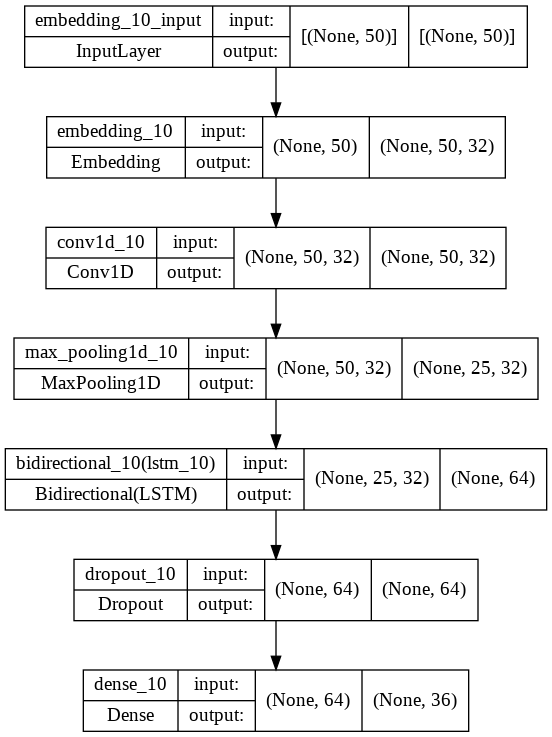

In [261]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [262]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [263]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [264]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 26s 35ms/step - loss: 3.2390 - accuracy: 0.1437 - precision_10: 0.7832 - recall_10: 0.0336 - val_loss: 2.7788 - val_accuracy: 0.2584 - val_precision_10: 0.8378 - val_recall_10: 0.1296
Epoch 2/500
591/591 [==============================] - 19s 33ms/step - loss: 2.5833 - accuracy: 0.3180 - precision_10: 0.8274 - recall_10: 0.1730 - val_loss: 2.3087 - val_accuracy: 0.4017 - val_precision_10: 0.8729 - val_recall_10: 0.2585
Epoch 3/500
591/591 [==============================] - 19s 33ms/step - loss: 2.2133 - accuracy: 0.4408 - precision_10: 0.8521 - recall_10: 0.2706 - val_loss: 1.9793 - val_accuracy: 0.5398 - val_precision_10: 0.8498 - val_recall_10: 0.3382
Epoch 4/500
591/591 [==============================] - 19s 33ms/step - loss: 1.9205 - accuracy: 0.5514 - precision_10: 0.8546 - recall_10: 0.3521 - val_loss: 1.7579 - val_accuracy: 0.5979 - val_precision_10: 0.8686 - val_recall_10: 0.4148
Epoch 5/500
591/591 [=======================

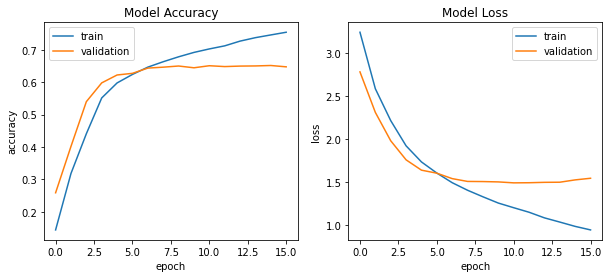

In [265]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

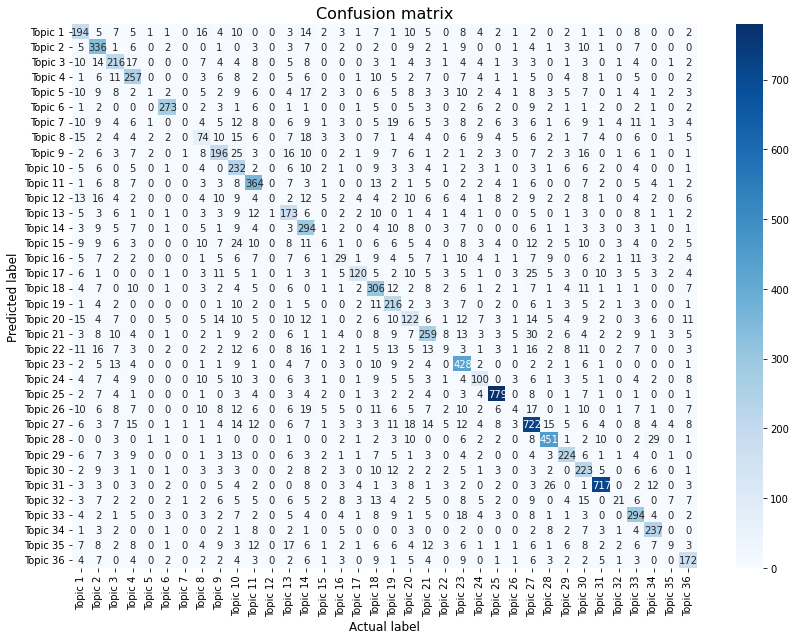

In [266]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24','Topic 25', 'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29', 'Topic 30', 'Topic 31', 'Topic 32', 'Topic 33', 'Topic 34', 'Topic 35', 'Topic 36']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [267]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_36.h5')
print('Best model saved')

Best model saved


# **Topic 40**

In [268]:
df_news=pd.read_csv('Dataset_For_Project/timesofindia_with_topic_40.csv', encoding='utf-8')
df_news

text    target  Topic
0      mp to study new motor act before implementing ...  Negative     33
1      bhujbal says higher power rate driving industr...  Negative      2
2      mandira bedi shares a monochrome picture in a ...  Negative     10
3      harassment in office  dm seeks action taken re...  Negative      2
4                    two students end their lives mumbai  Negative     38
...                                                  ...       ...    ...
62959  cbi takes over probe in iit m 'suicide' case i...  Positive     18
62960  going to india gate tonight? you could be in f...  Positive     19
62961  ; cops to ensure safe new year celebrations in...  Positive     11
62962  ten more private trains from mumbai on cards m...  Positive     11
62963  a trip to a tribal village with super cop vija...  Positive      1

[62964 rows x 3 columns]

In [269]:
df_news['Topic'].value_counts()

39    4008
37    3819
4     3456
12    3089
2     2554
24    2277
10    2256
19    2243
11    2163
23    1898
32    1867
3     1681
0     1679
25    1667
18    1647
22    1618
30    1569
20    1566
27    1460
26    1440
31    1436
29    1346
13    1243
9     1217
17    1183
15    1136
16    1123
36    1116
34    1114
8     1079
33     978
38     896
1      873
6      753
14     740
5      651
21     580
7      565
35     493
28     485
Name: Topic, dtype: int64

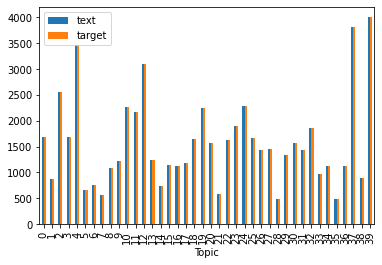

In [270]:
# The distribution of sentiments
df_news.groupby('Topic').count().plot(kind='bar')

In [271]:
import plotly.express as px

fig = px.pie(df_news, names='Topic', title ='Pie chart of different sentiments of tweets')
fig.show()

In [272]:

#For Preprocessing
import re    # RegEx for removing non-letter characters
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [273]:
def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df_news['text'][0])
print("\nProcessed tweet ->", tweet_to_words(df_news['text'][0]))


Original tweet -> mp to study new motor act before implementing it  cm kamal nath bhopal

Processed tweet -> ['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']


In [274]:
X = list(map(tweet_to_words, df_news['text']))


In [275]:
from sklearn.preprocessing import LabelEncoder

# Encode Topic labels
le = LabelEncoder()
Y = le.fit_transform(df_news['Topic'])

In [276]:
print(X[0])
print(Y[0])

['mp', 'studi', 'new', 'motor', 'act', 'implement', 'cm', 'kamal', 'nath', 'bhopal']
33


In [277]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #split into test and validation set

In [278]:
#Bag of words (BoW) extraction

from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [279]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['10th', '11th', '12th', '1b', '1st', '24x7', '2nd', '3d', '3rd', '4th', '50th', '550th', '5g', '5th', '66th', '6th', '7th', 'aadhaar', 'aaditya', 'aai', 'aamir', 'aap', 'aarey', 'aaryan', 'abandon', 'abduct', 'abdul', 'abet', 'abhaya', 'abhijit', 'abhishek', 'abl', 'ablaz', 'abort', 'abraham', 'abroad', 'abrog', 'abscond', 'absenc', 'absolut', 'abus', 'abvp', 'ac', 'academ', 'academi', 'acb', 'accept', 'access', 'accid', 'account', 'accus', 'ace', 'achiev', 'acid', 'acquir', 'acquisit', 'acquit', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actress', 'actual', 'ad', 'adalat', 'adani', 'adapt', 'add', 'addict', 'addit', 'address', 'adha', 'adieu', 'aditi', 'aditya', 'adityanath', 'adjourn', 'admin', 'administr', 'admir', 'admiss', 'admit', 'adopt', 'ador', 'adulter', 'advanc', 'advani', 'adventur', 'advertis', 'advic', 'advis', 'advisori', 'advoc', 'adyar', 'ae', 'affair', 'affect', 'affidavit', 'affili', 'afford', 'afghan', 'afghanistan', 'afir', 'africa', 'african

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [280]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df_news['text'][0])
X, tokenizer = tokenize_pad_sequences(df_news['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 mp to study new motor act before implementing it  cm kamal nath bhopal
After Tokenization & Padding 
 [ 338    1  391   43 2976  309  325  102   84 1027 1113   76    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [281]:
#Saving tokenized data
import pickle

# saving
with open('tokenizer_topic_40.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_topic_40.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [282]:
y = pd.get_dummies(df_news['Topic'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (37778, 50) (37778, 40)
Validation Set -> (12593, 50) (12593, 40)
Test Set -> (12593, 50) (12593, 40)


In [283]:
import keras.backend as K

def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [284]:
# Bidirectional LSTM using NN
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 8000
embedding_size = 32
epochs=500
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(40, activation='softmax'))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



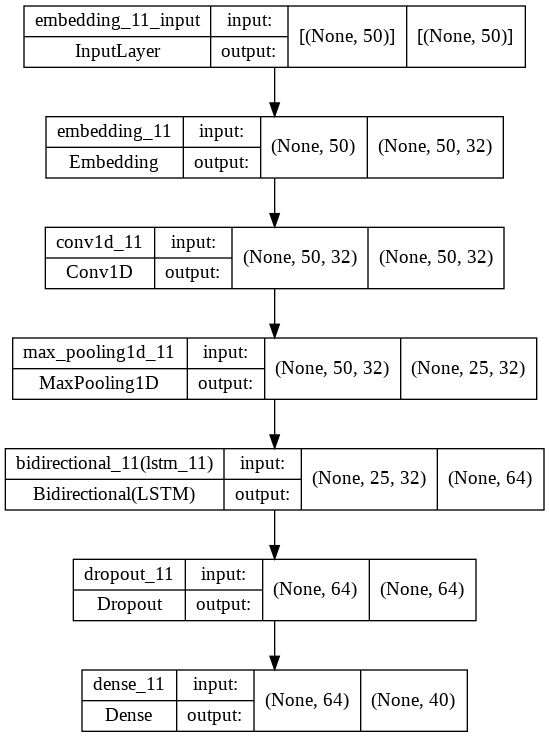

In [285]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [286]:
from keras import callbacks #callback function automatically stops looping/epochs when condition of accuracy or loss is met, in this case it is loss
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [287]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, 
               metrics=['accuracy', Precision(), Recall()])

In [288]:
history1 = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=500, callbacks =[earlystopping], verbose=1)

Epoch 1/500
591/591 [==============================] - 26s 35ms/step - loss: 3.3510 - accuracy: 0.1249 - precision_11: 0.7992 - recall_11: 0.0217 - val_loss: 3.0301 - val_accuracy: 0.1624 - val_precision_11: 0.9302 - val_recall_11: 0.0540
Epoch 2/500
591/591 [==============================] - 19s 33ms/step - loss: 2.7168 - accuracy: 0.2906 - precision_11: 0.8460 - recall_11: 0.1460 - val_loss: 2.4004 - val_accuracy: 0.4017 - val_precision_11: 0.8257 - val_recall_11: 0.2189
Epoch 3/500
591/591 [==============================] - 19s 33ms/step - loss: 2.2927 - accuracy: 0.4412 - precision_11: 0.8537 - recall_11: 0.2526 - val_loss: 2.0298 - val_accuracy: 0.5361 - val_precision_11: 0.8719 - val_recall_11: 0.3369
Epoch 4/500
591/591 [==============================] - 21s 36ms/step - loss: 1.9953 - accuracy: 0.5330 - precision_11: 0.8480 - recall_11: 0.3467 - val_loss: 1.8568 - val_accuracy: 0.5767 - val_precision_11: 0.8301 - val_recall_11: 0.4163
Epoch 5/500
591/591 [=======================

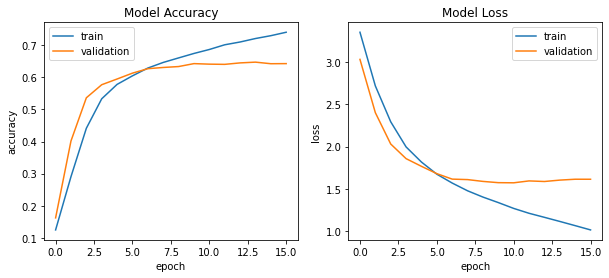

In [289]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history1)

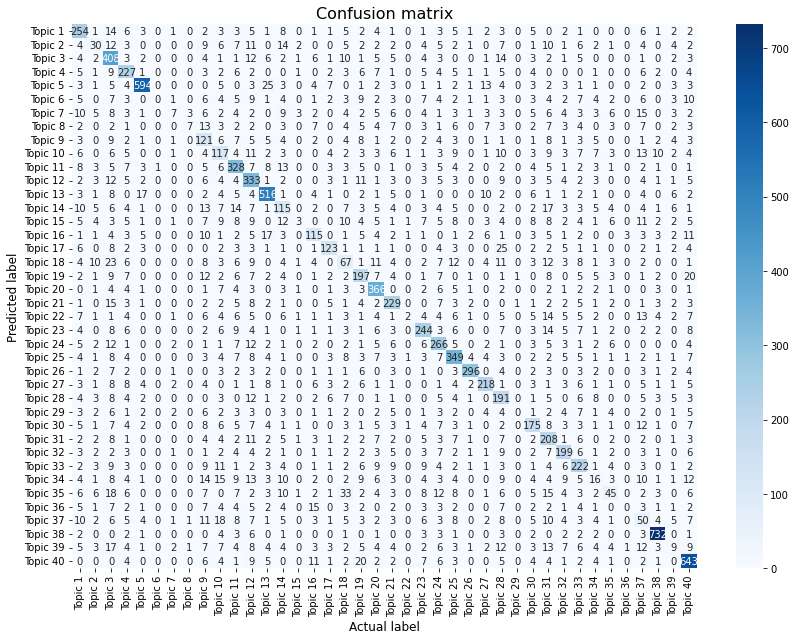

In [290]:
#Model confusion matrix

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7', 'Topic 8', 'Topic 9', 'Topic 10', 'Topic 11', 'Topic 12','Topic 13', 'Topic 14', 'Topic 15', 'Topic 16', 'Topic 17', 'Topic 18', 'Topic 19', 'Topic 20', 'Topic 21', 'Topic 22', 'Topic 23', 'Topic 24','Topic 25', 'Topic 26', 'Topic 27', 'Topic 28', 'Topic 29', 'Topic 30', 'Topic 31', 'Topic 32', 'Topic 33', 'Topic 34', 'Topic 35', 'Topic 36', 'Topic 37', 'Topic 38', 'Topic 39', 'Topic 40']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(14,10))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [291]:
# Save the model architecture & the weights
model.save('toi_model_for_topic_40.h5')
print('Best model saved')

Best model saved
